In [2]:
import pandas as pd
   
HRdf= pd.read_csv(r"C:\Users\Manjula\Desktop\DataScienceAssignments\Csv_filesforDS/houseRegressionStudents (1).csv")

In [3]:
HRdf.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
HRdf.drop(columns=['Unnamed: 0', 'Id'], axis=1, inplace=True)

In [5]:
HRdf.head(2)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [6]:
HRdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

In [7]:
# Since there are columns with int and object type, will segregate them first
numcol= HRdf.select_dtypes(['int64'])
objcol= HRdf.select_dtypes(['O'])

In [8]:
numcol.shape, objcol.shape

((1460, 34), (1460, 27))

In [9]:
# since there are too many(27 cols) columns with oject type, for conversion i will apply get_dummies function
objcol_toNum= pd.get_dummies(objcol)
objcol_toNum.head()


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
objcol_toNum.info()    # we can here see that all dtypes is been converted to int values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 182 entries, MSZoning_C (all) to SaleCondition_Partial
dtypes: uint8(182)
memory usage: 259.6 KB


In [11]:
# now since we have all columns with int dtype lets concatenate with dtypes of int columns and get our newdf
newHRdf= pd.concat([numcol, objcol_toNum], axis=1)
newHRdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 216 entries, MSSubClass to SaleCondition_Partial
dtypes: int64(34), uint8(182)
memory usage: 647.4 KB


In [12]:
newHRdf.tail(2)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,0,0,0,1,0,0,0,0,1,0
1459,20,9937,5,6,1965,1965,830,290,136,1256,...,0,0,0,1,0,0,0,0,1,0


In [13]:
newHRdf.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=216)

In [14]:
newHRdf.isnull().sum()

MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 216, dtype: int64

In [15]:
#  in our new df we have 216 columns. lets check the correlation factor and get only the good columns needed for further study
# will first divide X and Y variables

X= newHRdf.drop(['SalePrice'], axis=1)
Y= newHRdf['SalePrice']

In [16]:
X.shape, Y.shape

((1460, 215), (1460,))

In [17]:
#  correlation 
X.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.019779,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,-0.023431,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.016241,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.014874,-0.015130,-0.034618,-0.055895,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,0.030002,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,0.021369,-0.026277,-0.059130,-0.047002,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.000983,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,0.000765,-0.007929,0.021534,0.019569,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.024359,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.019560,0.041207,-0.153930,-0.160222,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [18]:
# we will wirte a function through which we can select highly correlated features. 
# function code for correlation 

def correlation(dataset, threshold):
    cols_having_high_correlation= set()
    corr_matrix= X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname= corr_matrix.columns[i]
                cols_having_high_correlation.add(colname)
    return cols_having_high_correlation      
    
    

In [19]:
correlated_Columns= correlation(X, 0.4)
len(correlated_Columns)

84

In [20]:
#  these are the ones which are highly correlated
correlated_Columns

{'1stFlrSF',
 'BedroomAbvGr',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtFullBath',
 'BsmtUnfSF',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1_Norm',
 'Condition2_Norm',
 'Condition2_RRAe',
 'ExterCond_Ex',
 'ExterCond_TA',
 'ExterQual_Ex',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Exterior1st_CemntBd',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'Fireplaces',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'FullBath',
 'Functional_Typ',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'HeatingQC_Ex',
 'HeatingQC_Gd',
 'HeatingQC_TA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_Wall',
 'HouseSty

In [21]:
#  these 84 columns are unneccesary columns so just drop them from my X
X.drop(correlated_Columns, axis=1, inplace= True)

In [22]:
X.shape, Y.shape

((1460, 131), (1460,))

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 131 entries, MSSubClass to SaleCondition_Family
dtypes: int64(19), uint8(112)
memory usage: 376.5 KB


In [24]:
X.tail(2)

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
1458,20,9717,5,6,49,1029,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1459,20,9937,5,6,830,290,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#  I still have 131 columns in the df. So will now check the constant features and remove them from df

from sklearn.feature_selection import VarianceThreshold
var_thresh= VarianceThreshold(threshold=0.10)
var_thresh.fit(X)

VarianceThreshold(threshold=0.1)

In [26]:
#  to know which are my good variance features will apply get_support function

var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [27]:
nonconstant_col=  X.columns[var_thresh.get_support()==True]

In [28]:
constant_col= X.columns[var_thresh.get_support() == False]

In [29]:
nonconstant_col                 # these are above the threshold and are good colmns further.. 

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LotShape_IR1', 'LotConfig_Corner',
       'Neighborhood_NAmes', 'RoofStyle_Gable', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd'],
      dtype='object')

In [30]:
constant_col           # these are the ones below the threshold which may not be needed further as they are constant and doesnt have much contribution

Index(['BsmtHalfBath', 'KitchenAbvGr', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'Street_Grvl', 'LotShape_IR2', 'LotShape_IR3',
       'LandContour_Bnk', 'LandContour_HLS',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family'],
      dtype='object', length=108)

In [31]:
len(nonconstant_col), len(constant_col)    # now i got my good columns reduced to 23 from 131

(23, 108)

In [32]:
new_df= X.drop(constant_col, axis=1)          # droped my constant cols 

In [33]:
new_df['SalePrice']= Y

In [34]:
#  this is my new df with all important columns ready
new_df.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LotShape_IR1', 'LotConfig_Corner',
       'Neighborhood_NAmes', 'RoofStyle_Gable', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'SalePrice'],
      dtype='object')

In [35]:
new_df.head(2)

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,...,MiscVal,MoSold,YrSold,LotShape_IR1,LotConfig_Corner,Neighborhood_NAmes,RoofStyle_Gable,Exterior1st_HdBoard,Exterior1st_MetalSd,SalePrice
0,60,8450,7,5,706,0,854,0,0,61,...,0,2,2008,0,0,0,1,0,0,208500
1,20,9600,6,8,978,0,0,0,298,0,...,0,5,2007,0,0,0,1,0,1,181500


In [36]:
len(new_df.columns)             # in ow have 24 good columns

24

In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   MSSubClass           1460 non-null   int64
 1   LotArea              1460 non-null   int64
 2   OverallQual          1460 non-null   int64
 3   OverallCond          1460 non-null   int64
 4   BsmtFinSF1           1460 non-null   int64
 5   BsmtFinSF2           1460 non-null   int64
 6   2ndFlrSF             1460 non-null   int64
 7   LowQualFinSF         1460 non-null   int64
 8   WoodDeckSF           1460 non-null   int64
 9   OpenPorchSF          1460 non-null   int64
 10  EnclosedPorch        1460 non-null   int64
 11  3SsnPorch            1460 non-null   int64
 12  ScreenPorch          1460 non-null   int64
 13  PoolArea             1460 non-null   int64
 14  MiscVal              1460 non-null   int64
 15  MoSold               1460 non-null   int64
 16  YrSold               146

In [38]:
#  now will divide my X and Y variables 
X= new_df.drop(['SalePrice', 'MiscVal','2ndFlrSF', '3SsnPorch'], axis=1)
Y= new_df['SalePrice']

In [39]:
X.shape, Y.shape

((1460, 20), (1460,))

In [40]:
# will try to get similar range of values by scaling the data
from sklearn.preprocessing import StandardScaler
scaling_data= StandardScaler()
scaled_X= scaling_data.fit_transform(X)
scaled_X[:5]

array([[ 0.07337496, -0.20714171,  0.65147924, -0.51719981,  0.57542484,
        -0.28865283, -0.12024172, -0.75217584,  0.21650316, -0.3593249 ,
        -0.27020835, -0.06869175, -1.5991111 ,  0.13877749, -0.70420284,
        -0.46873869, -0.42683279,  0.5287526 , -0.42346368, -0.42121177],
       [-0.87256276, -0.09188637, -0.07183611,  2.17962776,  1.17199212,
        -0.28865283, -0.12024172,  1.62619479, -0.70448325, -0.3593249 ,
        -0.27020835, -0.06869175, -0.48911005, -0.61443862, -0.70420284,
        -0.46873869, -0.42683279,  0.5287526 , -0.42346368,  2.3741027 ],
       [ 0.07337496,  0.07347998,  0.65147924, -0.51719981,  0.09290718,
        -0.28865283, -0.12024172, -0.75217584, -0.07036146, -0.3593249 ,
        -0.27020835, -0.06869175,  0.99089135,  0.13877749,  1.4200454 ,
        -0.46873869, -0.42683279,  0.5287526 , -0.42346368, -0.42121177],
       [ 0.30985939, -0.09689747,  0.65147924, -0.51719981, -0.49927358,
        -0.28865283, -0.12024172, -0.75217584, -

In [41]:
#  train test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(scaled_X, Y, train_size=0.8)

In [42]:
X_train.shape, X_test.shape

((1168, 20), (292, 20))

In [43]:
# fit mulitilinear algorithm
from sklearn.linear_model import LinearRegression 
LRm= LinearRegression()
LRm.fit(X_train,Y_train)

LinearRegression()

In [44]:
Y_pred= LRm.predict(X_test)

In [45]:
from sklearn.metrics import r2_score, mean_squared_error
LRm_accuracy= r2_score(Y_test, Y_pred)
mse1= mean_squared_error(Y_test, Y_pred)

In [46]:
print(f"By implementing Linear Regression model acheived accuracy of : {LRm_accuracy} with mean squred error as: {mse1}")

By implementing Linear Regression model acheived accuracy of : 0.6930217291001616 with mean squred error as: 2296468633.7141166


# ✔ The accuracy with multiple linear Regression is 69%

In [47]:
# Now i will implement random Forest Regressor 

In [48]:
scaled_X.shape, Y.shape

((1460, 20), (1460,))

In [49]:
xtrain, xtest, ytrain, ytest= train_test_split(scaled_X, Y, test_size=0.2)

In [50]:
from sklearn.ensemble import RandomForestRegressor
RFr= RandomForestRegressor()               # will initialze the model

RFr.fit(xtrain, ytrain)                   # will train the model

RandomForestRegressor()

In [51]:
ypred= RFr.predict(xtest)

In [52]:
print(f"accuracy with Random Forest Regressor: {r2_score(ytest,ypred)}")

accuracy with Random Forest Regressor: 0.7311012701111648


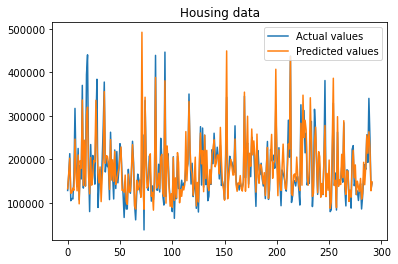

In [53]:
#  lets see the plot
import matplotlib.pyplot as plt
yaxis= range(len(ytest))
plt.plot(yaxis, ytest, label= "Actual values")
plt.plot(yaxis, ypred, label= "Predicted values")
plt.title("Housing data")
plt.legend()
plt.show()

# ✔ here I see there is a significant difference in accuracy when used Random Forest regressor. The accuarcy is 73% 
 

# Will now implement XGB Regressor

In [55]:
x_train, x_test, y_train, y_test= train_test_split(scaled_X, Y, train_size=0.8)

In [56]:
import xgboost as xg
# Instantiation             # initializing the model
xgb_r = xg.XGBRegressor(n_estimators = 10, seed = 100)



In [57]:
# fitting/training the model
xgb_r.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=100,
             reg_alpha=0, reg_lambda=1, ...)

In [58]:
y_predi= xgb_r.predict(x_test)

In [63]:
# MSE and RMSE Computation
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

mse= MSE(y_test, y_predi)
rmse = np.sqrt(MSE(y_test, y_predi))
print("MSE: %f" %(mse))
print("RMSE: % f" %(rmse))

MSE: 1854919076.762168
RMSE:  43068.771480


In [64]:
# evaluation
# cross_val_score always generates 5 scores with 5 different scenarios
from sklearn.model_selection import cross_val_score

score= cross_val_score(xgb_r, y_test, y_predi)
score


array([0.54578658, 0.61650588, 0.676694  , 0.56095753, 0.61466217])

In [65]:
print(f"accuracy with XGBoost Regressor: {score.mean()}")

accuracy with XGBoost Regressor: 0.6029212312602238


# ✔ when applied XGBoost Regressor i get 60% accuracy.

# ✔ Conclusion: Multilinear, Random Forest and XGBoost regressors are good models predicting this housing dataset. 